In [1]:
# HTML code to toggle code cell visibility
from IPython.display import HTML
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/
jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="
javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
# Import libraries and set global settings and variables
from IPython.display import display, HTML
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import sys
import math
import time
import matplotlib.pyplot as plt
from scipy.stats import chi2
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

mpl.rcParams['patch.force_edgecolor'] = True
warnings.filterwarnings("ignore")
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('mode.chained_assignment', None)

# Benford's Law percentages for leading digits 1-9
BENFORD = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

In [3]:
# Utility functions
def plot_bl():
    # Plot Benford's Distribution
    fig, ax = plt.subplots(figsize=(15, 8))
    index = [i + 1 for i in range(len(BENFORD))]  # 1st digits for x-axis

    # text for labels, title and ticks
    fig.canvas.set_window_title('Percentage First Digits')
    ax.set_title(f"Benford's distribution",
                 fontsize=16)
    ax.set_xlabel('1st digit', fontsize=16)
    ax.set_ylabel('Frequency (%)', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(index, fontsize=14)

    # build bars
    rects = ax.bar(index, BENFORD, width=0.95, color='#1DA1F2',
                   label=f'Benford', alpha=0.8)

    # attach a text label above each bar displaying its height
    for rect in rects:

        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '{:0.1f}'.format(height), ha='center', va='bottom', fontsize=13)

    # Hide the right and top spines & add legend
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(prop={'size': 15}, frameon=False)
    plt.show()


def check_stats():
    """Returns the dimensions, info, and statistics of a given data frame."""
    # Preview data
    display(df.sample(5))

    # Get the dimensions of the df
    print(f'Number of rows: {df.shape[0]}\n'
          f'Number of columns: {df.shape[1]}\n')

    # List the datatype of each column and count of non-null values
    print(f'List of all columns, count of non-null values, and datatypes of '
          'the df:\n')
    display(df.info())

    # Get summary statistics for the numerical columns and transpose the DataFrame
    # for more readable output
    print(f'\nSummary statistics for numerical columns:\n')
    display(df.describe())

    # Get summary statistics for the object (string) columns
    print(f'Summary statistics for object(string) columns:\n')
    display(df.describe(include=[object]).T)

    # Get count of null values
    print(f'Check for null columns:\n')
    display(df.isna().sum())

    # display % of null values per column
    print(f'Display % of null columns:\n')
    display(df.isna().sum() / (len(df))*100)


def count_dist():
    """Returns the countplot of the distribution of friends and
    followers the data frame."""
    fig, ax = plt.subplots(figsize=(11, 5))
    ax = sns.countplot(x=df['is_fake'],
                       order=df['is_fake'].value_counts(ascending=False).index,  
                       palette=['red', "#1DA1F2"])
    abs_values = df['is_fake'].value_counts(ascending=False)
    rel_values = df['is_fake'].value_counts(
        ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    plt.xticks([0, 1], ['fake', 'genuine'])
    ax.bar_label(container=ax.containers[0],
                 labels=lbls, fontsize='15', padding=-20)
    ax.set_xlabel('user class', fontsize='16')
    ax.set_ylabel('count', fontsize='16')
    ax.set_title('Count of fake/genuine accounts', fontsize='20')
    fig.tight_layout()
    plt.show()


def pairplot():
    """Returns a pairplot of a given data frame."""
    sns.set(style="ticks")
    df1 = df[['statuses_count', 'followers_count', 'friends_count',
             'favourites_count', 'listed_count', 'followers_friends_ratio', 
              'is_fake']]
    sns.pairplot(df1, hue="is_fake", diag_kind='kde',
                 palette=['#1DA1F2', 'red'])


def plot_heatmap():
    """Returns a heatmap of a data frame."""
    plt.figure(figsize=(15, 8))
    sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
    plt.tight_layout()
    plt.show()


def friends_followers_regplot():
    """Returns the plot of followers and friends count of fake and genuine
    accounts."""
    fig = plt.figure(figsize=(15, 8))
    plt.subplot(2, 1, 1)
    plt.title('Fake Friends / Followers')
    sns.regplot(fake.friends_count, fake.followers_count,
                color='red', label='Fake')
    plt.xlim(0, 2500)
    plt.ylim(0, 2500)
    fig.tight_layout()

    plt.subplot(2, 1, 2)
    plt.title('genuine Friends / Followers')
    sns.regplot(genuine.friends_count, genuine.followers_count,
                color='#1DA1F2', label='genuine')
    plt.xlim(0, 2500)
    plt.ylim(0, 2500)

    plt.tight_layout()
    plt.show()


def count_first_digit(df=None, data_str=None):
    """Returns the total count, data count, and data percentage of the count
    of each non-zero FIRST digit of the values of a given column.
    """
    mask = df[data_str] > 0.

    data = list(df[mask][data_str])
    for i in range(len(data)):
        while data[i] >= 10:
            data[i] = data[i]/10
    first_digits = [int(x) for x in sorted(data)]
    # a list with unique values of first_digit list
    unique = (set(range(1, 10)))
    data_count = []
    for i in unique:
        count = first_digits.count(i)
        data_count.append(count)
    total_count = sum(data_count)
    data_percentage = [(i/total_count)*100 for i in data_count]
    return total_count, data_count, data_percentage


def get_expected_counts(total_count):
    """Returns the list of the expected Benford's Law first digit counts
    based on the total sample count."""
    total_count, data_count, data_percentage = count_first_digit(df, data_str)
    return [round(p * total_count / 100) for p in BENFORD]


def chi_squared_test(data_count, total_count, expected_counts):
    """Return boolean on chi-squared test (8 degrees of freedom & alpha=0.05).
    """
    expected_counts = get_expected_counts(total_count)
    obs = data_count
    total = total_count
    # Null hypo, probability distribution over classes
    h0 = [round(i/100, 6) for i in BENFORD]
    k = 9
    Q = 0
    for i in range(k):
        Q = Q + ((obs[i] - total*h0[i])**2)/(total*h0[i])

    p_value = 1 - chi2.cdf(Q, k - 1)
    print(f'\n                     Chi-Squared Statistic = {Q:.4f}')
    print(f'                                   p-value = {p_value:.4f}')

    alpha = 0.05
    Q_crit = chi2.ppf(1 - alpha, k - 1)
    print(f'For alpha={alpha}, Chi-Squared Critical Value = {Q_crit:.4f}')
    return Q < Q_crit


def bar_chart(data_pct):
    """Make bar chart of the observed vs expected 1st digit frequency in %."""
    fig, ax = plt.subplots(figsize=(15, 8))
    index = [i + 1 for i in range(len(data_pct))]  # 1st digits for x-axis

    # text for labels, title and ticks
    fig.canvas.set_window_title('Percentage First Digits')
    ax.set_title(f'{data_str} 1st digit distribution vs. Benford distribution',
                 fontsize=16)
    ax.set_xlabel('1st digit', fontsize=16)
    ax.set_ylabel('Frequency (%)', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(index, fontsize=14)

    # build bars
    rects = ax.bar(index, data_pct, width=0.95, color='#1DA1F2',
                   label=f'{data_str}', alpha=0.8)

    # attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '{:0.1f}'.format(height), ha='center', va='bottom',
                fontsize=13)

    # plot Benford values as dots
    ax.scatter(index, BENFORD, s=150, c='red', zorder=2, label='Benford',
               alpha=0.8)
    ax.plot(index, BENFORD, c='red', zorder=2,
            alpha=0.8)

    # Hide the right and top spines & add legend
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(prop={'size': 15}, frameon=False)
    plt.show()


def main(df, data_str):
    """Returns the statistics of the data and graph of the distribution of
    results."""
    total_count, data_count, data_percentage = count_first_digit(df, data_str)
    expected_counts = get_expected_counts(total_count)
    bar_chart(data_percentage)
    if chi_squared_test(data_count, total_count, expected_counts):
        print("Observed distribution matches expected BL distribution.")
    else:
        print("Observed distribution does not match expected.",
              file=sys.stderr)


def standard_scale_df():
    """Returns standard scaled data frame."""
    sc = StandardScaler()
    cols_to_scale = ['statuses_count', 'followers_count', 'friends_count',
                     'favourites_count', 'listed_count', 
                     'followers_friends_ratio']
    print('Before scaling:\n')
    display(df_features[cols_to_scale].head())
    df_features[cols_to_scale] = sc.fit_transform(df_features[cols_to_scale])
    print('After scaling:\n')
    display(df_features[cols_to_scale].head())


def auto_ML_7in1(X, y, Number_trials=1):
    """Returns 7-in-1 simple auto-ML results for classifiers."""
    def train_knn(X, y):
        score_train = []
        score_test = []

        for seed in range(Number_trials):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=seed)

            neighbors_settings = range(1, 70)
            acc_train = []
            acc_test = []

            for n_neighbors in neighbors_settings:
                clf = KNeighborsClassifier(
                    n_neighbors=n_neighbors)  # build the model
                clf.fit(X_train, y_train)
                acc_train.append(clf.score(X_train, y_train))
                acc_test.append(clf.score(X_test, y_test))

            score_train.append(acc_train)
            score_test.append(acc_test)

        train_score = np.mean(score_train, axis=0)
        test_score = np.mean(score_test, axis=0)
        run_time = (time.time() - start_time)
        return ['kNN', train_score[(np.argmax(np.amax(test_score)))],
                np.amax(test_score),
                'N_Neighbor = {0}'.format(np.argmax(test_score)+1),
                'NA', run_time]

    def train_logistic(X, y, reg):
        C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
             1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
        #C = [.01, .1]
        score_train = []
        score_test = []
        weighted_coefs = []

        for seed in range(Number_trials):
            training_accuracy = []
            test_accuracy = []
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=seed)

            for alpha_run in C:
                if reg == 'l1':
                    lr = LogisticRegression(C=alpha_run, penalty=reg, 
                                            solver='liblinear').fit(
                        X_train, y_train)
                if reg == 'l2':
                    lr = LogisticRegression(C=alpha_run, penalty=reg, 
                                            dual=False).fit(
                        X_train, y_train)

                training_accuracy.append(lr.score(X_train, y_train))
                test_accuracy.append(lr.score(X_test, y_test))
                coefs = lr.coef_
                # append all the computed coefficients per trial
                weighted_coefs.append(coefs)

            score_train.append(training_accuracy)
            score_test.append(test_accuracy)

        # get the mean of the weighted coefficients over all the trials
        mean_coefs = np.mean(weighted_coefs, axis=0)
        # print(mean_coefs)
        train_score = np.mean(score_train, axis=0)
        test_score = np.mean(score_test, axis=0)

        # Plot the weight of the parameters
        top_predictor = X.columns[np.argmax(np.abs(mean_coefs))]
        abs_mean_coefs = np.abs(mean_coefs[0, :])
        coefs_count = len(abs_mean_coefs)
        fig, ax = plt.subplots(figsize=(3, 7))
        ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        plt.title('Logistic ({0})'.format(reg))
        plt.xlabel("Feature importance")
        plt.ylabel("Feature")
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

        run_time = (time.time() - start_time)
        return ['Logistic ({0})'.format(reg), 
                train_score[(np.argmax(test_score))],
                np.amax(test_score), 'C = {0}'.format(
                    C[np.argmax(test_score)]),
                top_predictor, run_time]

    def train_svm(X, y, reg):
        C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75,
             1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
        #C = [.01, .1]
        score_train = []
        score_test = []
        weighted_coefs = []

        for seed in range(Number_trials):
            training_accuracy = []
            test_accuracy = []
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=seed)

            for alpha_run in C:
                if reg == 'l1':
                    svc = LinearSVC(C=alpha_run, penalty=reg, 
                                    loss='squared_hinge', dual=False).fit(
                        X_train, y_train)
                if reg == 'l2':
                    svc = LinearSVC(C=alpha_run, penalty=reg).fit(
                        X_train, y_train)
                training_accuracy.append(svc.score(X_train, y_train))
                test_accuracy.append(svc.score(X_test, y_test))

                coefs = svc.coef_
                weighted_coefs.append(coefs)

            score_train.append(training_accuracy)
            score_test.append(test_accuracy)

        # get the mean of the weighted coefficients over all the trials
        mean_coefs = np.mean(weighted_coefs, axis=0)
        train_score = np.mean(score_train, axis=0)
        test_score = np.mean(score_test, axis=0)

        top_predictor = X.columns[np.argmax(np.abs(mean_coefs))]
        abs_mean_coefs = np.abs(mean_coefs[0, :])
        coefs_count = len(abs_mean_coefs)
        fig, ax = plt.subplots(figsize=(3, 7))
        ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        plt.title('Linear SVM ({0})'.format(reg))
        plt.xlabel("Feature importance")
        plt.ylabel("Feature")
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

        run_time = (time.time() - start_time)
        return ['Linear SVM ({0})'.format(reg), 
                train_score[(np.argmax(test_score))],
                np.amax(test_score), 'C = {0}'.format(
                    C[np.argmax(test_score)]),
                top_predictor, run_time]

    def train_RF(X, y, reg):
        max_features_tuning = [0.1, .2, .3, .4, .5, .7, .8]
        #C = [.01, .1]
        score_train = []
        score_test = []
        weighted_coefs = []

        for seed in range(Number_trials):
            training_accuracy = []
            test_accuracy = []
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=seed)

            for max_features_run in max_features_tuning:
                svc = RandomForestClassifier(
                    n_estimators=100, 
                    max_features=max_features_run).fit(X_train, y_train)
                training_accuracy.append(svc.score(X_train, y_train))
                test_accuracy.append(svc.score(X_test, y_test))

                coefs = svc.feature_importances_
                weighted_coefs.append(coefs)

            score_train.append(training_accuracy)
            score_test.append(test_accuracy)

        # get the mean of the weighted coefficients over all the trials
        mean_coefs = np.mean(weighted_coefs, axis=0)
        train_score = np.mean(score_train, axis=0)
        test_score = np.mean(score_test, axis=0)

        top_predictor = X.columns[np.argmax(np.abs(mean_coefs))]
        abs_mean_coefs = np.abs(mean_coefs[:])
        coefs_count = len(abs_mean_coefs)
        fig, ax = plt.subplots(figsize=(3, 7))
        ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        plt.title('Random Forest')
        plt.xlabel("Feature importance")
        plt.ylabel("Feature")
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

        run_time = (time.time() - start_time)
        return ['Random Forest', train_score[(np.argmax(test_score))],
                np.amax(test_score),
                'Max_features = {0}'.format(
                    max_features_tuning[np.argmax(test_score)]),
                top_predictor, run_time]

    def train_GBM(X, y, reg):
        max_features_tuning = [0.1, .2, .3, .4, .5, .7, .8]
        #C = [.01, .1]
        score_train = []
        score_test = []
        weighted_coefs = []

        for seed in range(Number_trials):
            training_accuracy = []
            test_accuracy = []
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=seed)

            for max_features_run in max_features_tuning:
                svc = GradientBoostingClassifier(
                    n_estimators=100, max_depth=3, 
                    max_features=max_features_run).fit(X_train, y_train)
                training_accuracy.append(svc.score(X_train, y_train))
                test_accuracy.append(svc.score(X_test, y_test))

                coefs = svc.feature_importances_
                weighted_coefs.append(coefs)

            score_train.append(training_accuracy)
            score_test.append(test_accuracy)

        # get the mean of the weighted coefficients over all the trials
        mean_coefs = np.mean(weighted_coefs, axis=0)
        test_score = np.mean(score_test, axis=0)
        train_score = np.mean(score_train, axis=0)

        top_predictor = X.columns[np.argmax(np.abs(mean_coefs))]
        abs_mean_coefs = np.abs(mean_coefs[:])
        coefs_count = len(abs_mean_coefs)
        fig, ax = plt.subplots(figsize=(3, 7))
        ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        plt.title('Gradient Boosting Method')
        plt.xlabel("Feature importance")
        plt.ylabel("Feature")
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

        run_time = (time.time() - start_time)
        return ['Gradient Boosting Method', 
                train_score[(np.argmax(test_score))],
                np.amax(test_score),
                'Max_features = {0}'.format(
                    max_features_tuning[np.argmax(test_score)]),
                top_predictor, run_time]

    start_time = time.time()
    a = train_knn(X, y)
    print(a)
    print("%s seconds" % a[5])

    start_time = time.time()
    b = train_logistic(X, y, reg='l2')
    print(b)
    print("%s seconds" % b[5])

    start_time = time.time()
    c = train_logistic(X, y, reg='l1')
    print(c)
    print("%s seconds" % c[5])

    start_time = time.time()
    d = train_svm(X, y, reg='l2')
    print(d)
    print("%s seconds" % d[5])

    start_time = time.time()
    e = train_svm(X, y, reg='l1')
    print(e)
    print("%s seconds" % e[5])

    start_time = time.time()
    f = train_RF(X, y, reg='none')
    print(f)
    print("%s seconds" % f[5])

    start_time = time.time()
    g = train_GBM(X, y, reg='none')
    print(g)
    print("%s seconds" % f[5])

    cols = ['Machine Learning Method', 'Train Accuracy', 'Test Accuracy',
            'Best Parameter', 'Top Predictor Variable', 'Run Time']
    df2 = pd.DataFrame(columns=cols)

    df2.loc[0] = a
    df2.loc[1] = b
    df2.loc[2] = c
    df2.loc[3] = d
    df2.loc[4] = e
    df2.loc[5] = f
    df2.loc[6] = g

    return df2

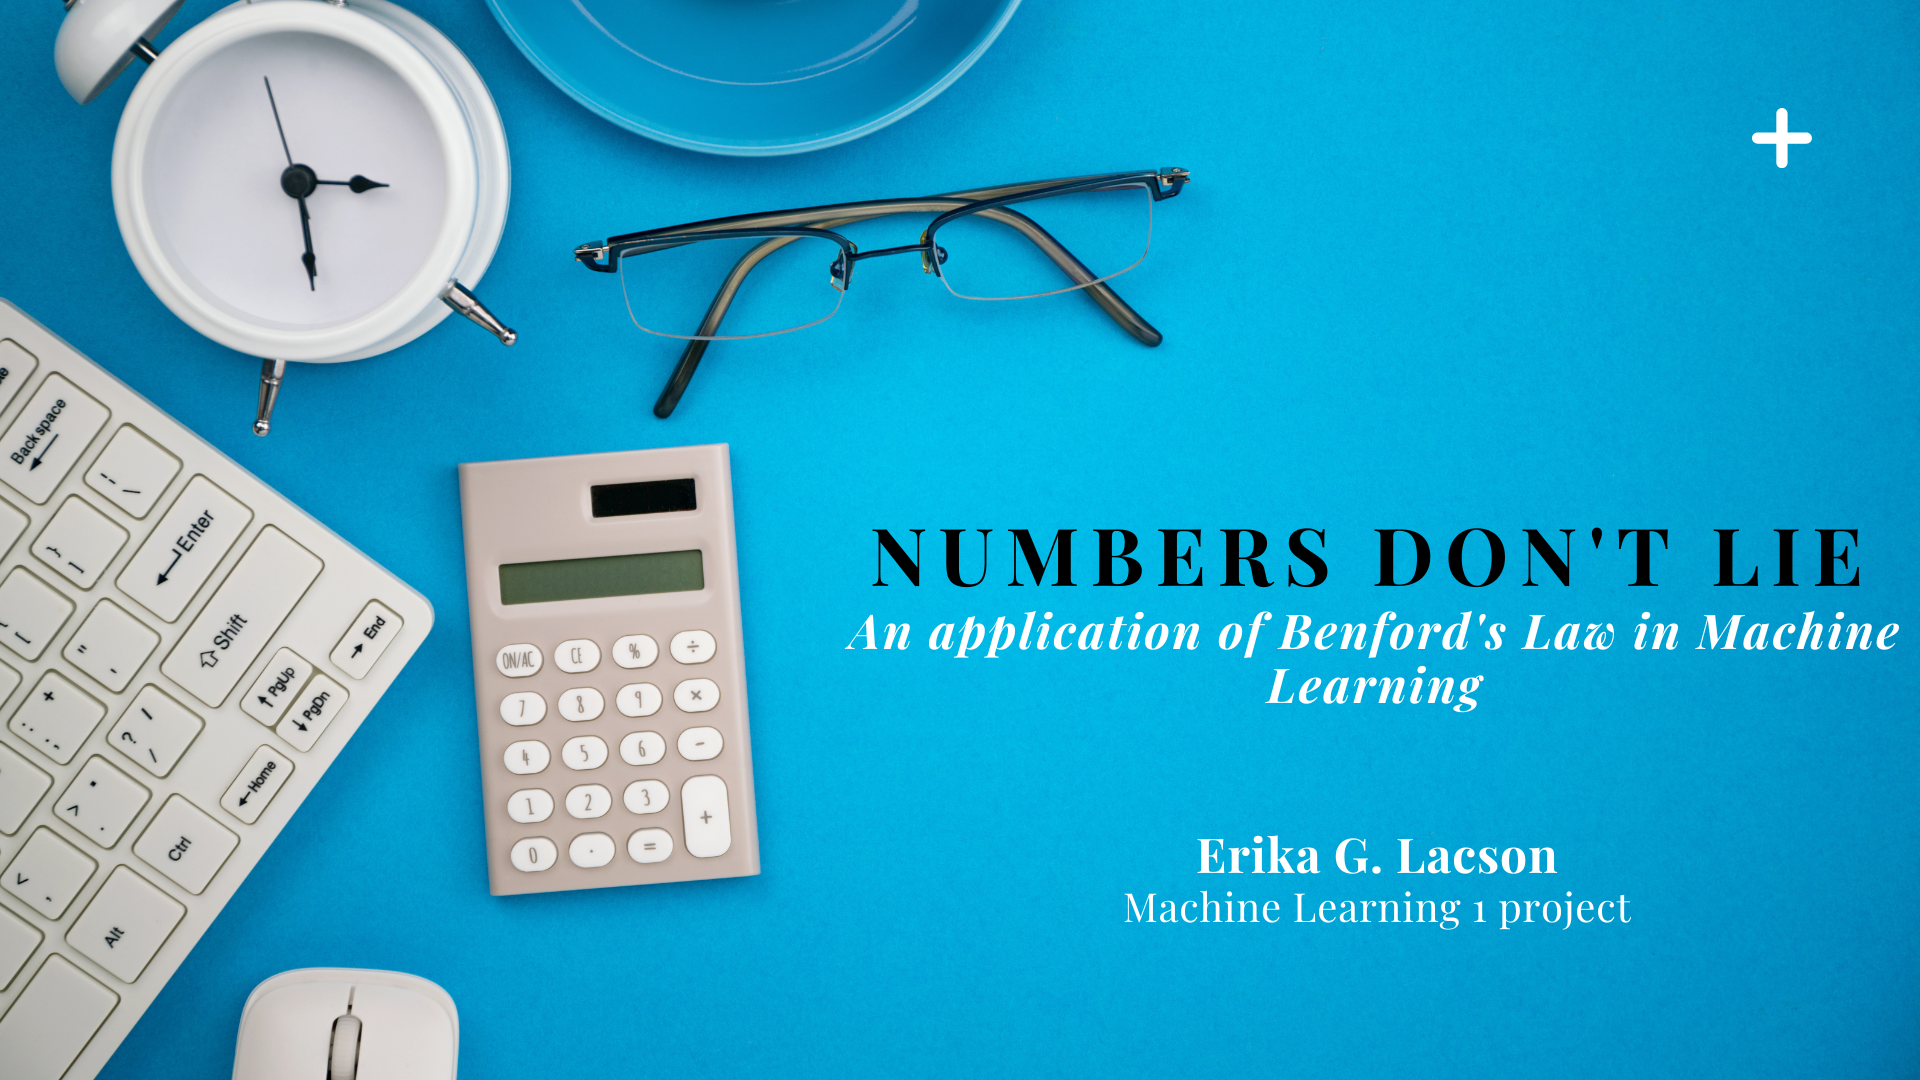

**Prepared by**: Erika G. Lacson

<h1 style="color:#1DA1F2">HIGHLIGHTS</h1>

1. Benford's Law was introduced.
2. The assumptions and scenarios when Benford's Law will be useful and when it will not be applicable were presented.
3. Some applications of Benford's Law in machine learning were provided.
4. Benford's Law and Machine Learning were both used to detect fake Twitter followers. Both methods led to the same conclusion.

<h1 style="color:#1DA1F2">EXECUTIVE SUMMARY</h1>

Fake followers represent Twitter profiles deliberately designed to exaggerate the follower count of a particular account. Such fake followers present a risk not just to the social media platform, but also to broader societal structures, as they have the potential to skew perceptions of popularity and influence within the Twitter ecosystem, thus influencing economic, political, and social dynamics[[1]](#Dataset).

Over the years, online social media interactions have become one of the primary communication methods utilized by humans. As technology and social media applications advance, so do the methods of fraud and online criminal activity. Throughout the Philippine election campaigns, we frequently hear about troll farms, bot farms, propaganda bots, and other malicious bots crafted to influence people. Although I initially wanted to use Facebook troll farms as part of my dataset, no real dataset was available that has an actual classification of troll versus genuine users. Hence, I decided to use Twitter, another app targeted by most malicious bots and fake followers, instead.

In view of the damage that fake followers inflict on our online communities, I sought to explore and introduce Benford's Law as a part of my ML model pipeline, aiming to gather insights that could improve the detection of fake followers in future studies.

To support my analysis, I applied a methodology that involves data collection, an introduction to Benford's Law, data cleaning and preprocessing, exploratory data analysis, checking dataset conformity to Benford's Law, and finally employing Machine Learning to detect fake Twitter followers and comparing its results with the Benford's Law conformity results.

One of the challenges encountered in this study was data limitation. Most of the available public data did not satisfy at least one of the key assumptions required for Benford's Law (BL), and the only suitable dataset was cresci-2015. These key assumptions include ensuring that the set of numbers is unlimited, meaning all leading digits from 1 to 9 are possible; numbers span multiple orders of magnitude with at least four digits; and the sample size is extensive, with a minimum of 1,000 samples for better accuracy.

The exploratory data analysis results revealed that `is_fake` (where 1 represents a fake follower, and 0 indicates a genuine account) is positively correlated with `friends_count` (the number of users a fake follower follows). This correlation is logical because the primary objective of a fake follower, for a fee or other reasons, is to follow multiple users. The rest of the features, such as `followers_count`, `favourites_count` (likes), and others are negatively correlated with `is_fake` because as these counts decrease, the likelihood of such an account being a fake follower increases.

Further processing of the dataset revealed that a dataset containing only genuine accounts follows Benford's Distribution, whereas any dataset that contained any fake followers violated Benford's Distribution. By using Benford's Law, I identified which dataset or data subsets showed any indication of the existence of fake followers. For all columns (features) that met the key criteria (assumptions) for the use of BL, I was able to confirm that the data subset for all genuine accounts adhered to BL distribution, while those that had any fake followers in the dataset (such as the fake data frame and combined/original data frame) violated the BL distribution.

Moreover, the auto-ML provided results consistent with the BL results. The `followers count` over `friends count` ratio was consistently the top predictor variable across all ML models used. This confirmed the initial intuition that the ratio of a fake follower's number of followers to the number of friends (followings) is the primary factor in determining if an account is fake or genuine.

In summary, we can conclude that naturally occurring datasets follow Benford's Law. A simple visualization of Benford's Law can be used as part of the pipeline for detecting anomalies, or as part of exploratory data analysis to check for irregularities indicating potential errors, fraud, manipulative bias, or issues with processing efficiency in a dataset. In addition, Benford's Law could also be applied as a standalone, initial indicator for the presence of fake followers, providing a rough yet valuable preliminary identification tool. Lastly, for large datasets, Benford's Law can assist in performing highly focused tests to detect deviations in subsets before starting with the Machine Learning modelling process.

<h1 style="color:#1DA1F2">METHODOLOGY</h1>

The methodology of this report aims to <b> introduce Benford's Law (BL) and present one of its applications in Machine Learning (ML).</b> 

The high-level methodology used in this study is as follows:

| No. | Step | Description |
| -: | :- | :- |
| 1. | **Data collection** | Download the cresci-2015 dataset from a Bot Repository website [[2]](#Bot_repository) . The cresci-2015 dataset is in csv format and contains (i) genuine and (ii) fake Twitter accounts, manually annotated by the original authors [[1]](#Dataset).
| 2. | **Introduce Benford's Law** | Introduce BL, plot its distribution, and provide the key assumptions and common examples. |
| 3. | **Data cleaning and preprocessing** | Prepare, clean, and process the collected data accordingly to get the relevant data subsets and columns. Remove or add necessary columns for further analysis and finalize the data frame and variables to be used. |
| 4. | **Exploratory Data Analysis (EDA)** | Perform a quick EDA to understand the dataset further and to check for relationships between the variables. |
| 5. | **Check conformity with Benford's Law** | Perform hypothesis testing regarding the conformity of a dataset or subset to the BL distribution and provide insights as to how it could help identify anomalies or irregularities that could indicate the existence of fake Twitter followers in the dataset. |
| 6. | **Use Machine Learning to detect fake Twitter followers** | Use auto-ML function to obtain the top predictor variable for detecting fake Twitter followers and compare its result to the BL results. |

<center><span style="font-size:12px;color:#717171"><b>Table 1. </b>Methodology</span></center>

<h1 style="color:#1DA1F2">DATA SOURCE AND DESCRIPTION</h1>

The source of the twitter user dataset is the Bot Repository website [[2]](#Bot_repository) that contains a collection of Twitter user account data. 

A **data limitation** issue faced in this step was that most of the available public data did not satisfy at least one the key assumptions required for BL and the only viable dataset that I found was the cresci-2015. 

Cresci-2015 is a dataset containing the collection of real data with genuine and fake twitter accounts, manually annotated by the original authors [[1]](#Dataset).

After downloading the dataset, I was able to gather and use 5301 accounts (rows) and 8 features (columns). Though there were more columns present in the dataset, only the following columns were considered relevant for this study:


| Column Name | Data Type | Short description |
| :---------- | :-------- | :---------------- |
|statuses_count            |int64  | Number of statuses posted by the user. |
|followers_count           |int64  | Number of followers a user has.|
|friends_count             |int64  | Number of users that a user follows (e.g., following) [[5]](#Twitter_Friends).|
|favourites_count          |int64  | Number of likes a user made.|
|listed_count              |int64  | Number of curated group of accounts (e.g., viewing a List timeline will show  a user a stream of Tweets from only the accounts on that List).|
|lang                      |object | Specifies the language the Tweet was written in, as identified by Twitter's machine language detection algorithms.|
|is_fake                   |int64  | Manually annotated, fake = 1; genuine = 0 based on the source authors' tagging.|
|followers_friends_ratio   |float64| Ratio of followers_count over friends_count (i.e., followers/following)|

<center><span style="font-size:12px;color:#717171"><b>Table 2. </b>Data Description</span></center>
    <UPDATE>

Another dataset used for a brief BL sample illustration only is the '14_Census_2000_2010.csv' from Mark Nigrini's website [[3]](#US_census), the author of Benford's Law book.

<h1 style="color:#1DA1F2">RESULTS AND DISCUSSION</h1>

<h2 style="color:#657786">Introduction to Benford's Law</h2>

What is the probability of rolling a 3 on a 6-sided die? It's 1/6, correct.

What are the chances of randomly selecting a number from 1 to 10 and getting 5? 1/10, right.

Suppose we have data containing the population of each county in the US for the year 2000.

What is the probability that a random population count begins with 1?

Logically, one might assume the answer is 1/9, correct? Surprisingly, that is wrong. 
The true probability is actually around 30%:

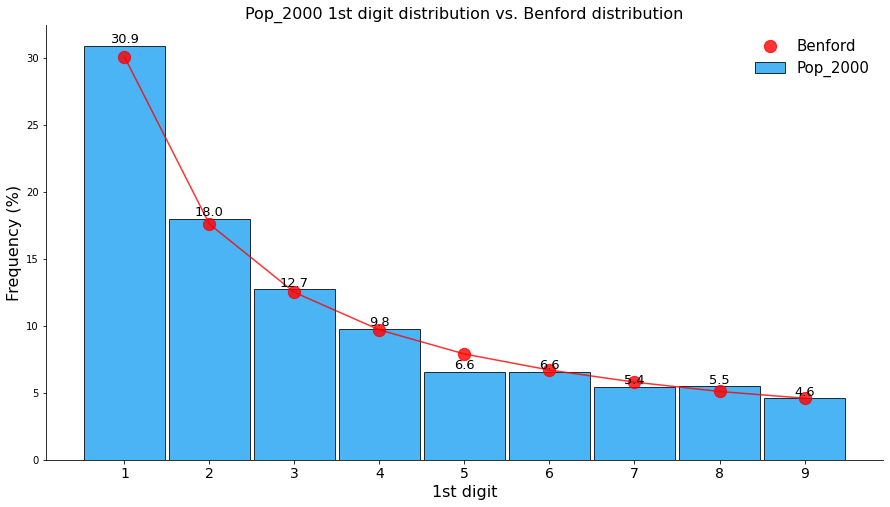


                     Chi-Squared Statistic = 9.9173
                                   p-value = 0.2709
For alpha=0.05, Chi-Squared Critical Value = 15.5073
Observed distribution matches expected BL distribution.


In [4]:
df = pd.read_csv('14_Census_2000_2010.csv')
data_str = 'Pop_2000'
main(df, data_str)

<center><span style="font-size:12px;color:#717171"><b>Figure 1. </b>1st Digit Distribution of US census in 2000</span></center>

And this isn't just true for population counts but also to other datasets as well.

This kind of distribution is called Benford distribution which was derived from Benford's law.

So what exactly is **Benford's Law**?

Benford's Law is also called the **law of anomalous numbers or the first digits law**.
It provides the probability of obtaining the first digit d appearing in a set of **natural** numbers.
According to the law, the probability of getting a 1 in the first digit position is 30.1% and run down to 4.6% for 9.

Here is the actual Benford's Law distribution, as visualized in the previous graph:

<h3 style="color:#14171A">Plot Benford's Distribution</h3>

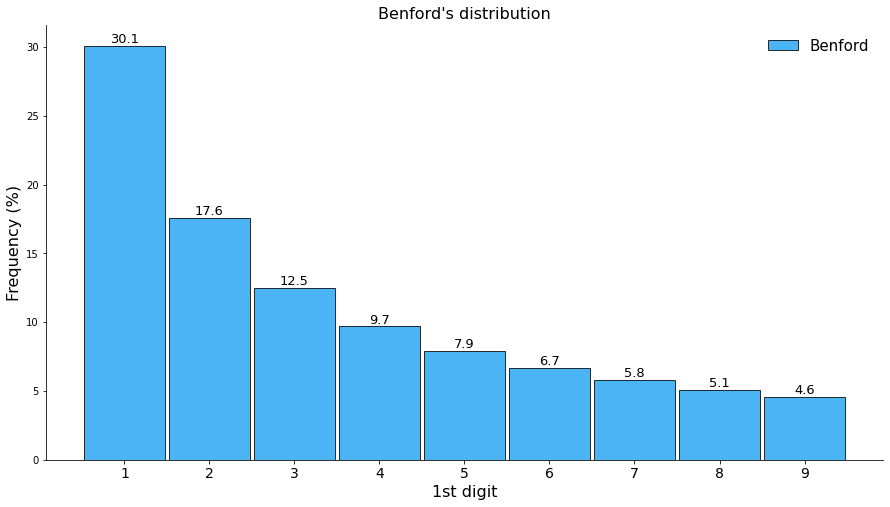

In [5]:
plot_bl()

<center><span style="font-size:12px;color:#717171"><b>Figure 2. </b>Benford's Law Distribution</span></center>

<h3 style="color:#14171A">BL Key Assumptions and Examples</h3>

Before we delve into its examples and applications, let's review its key assumptions:

* The set of numbers is **not limited**. (All leading digits are possible: 1 to 9)
* Numbers **span multiple orders of magnitudes** (1-10, 10-100, 100-1000, numbers **at least 4 digits** work best)
* **Sample size** is very large (Use the entire population, if possible; **Lower than 1,000 sample size will produce unreliable results**.)

**Some example datasets**

Some example datasets that do or do not follow BL are as follows [[4]](#Examples):

| Follows BL | Does not follow BL|
| :- | :- |
| Financial transactions (e.g., a full year's transactions would result in a BL distribution) | Dataset with pre-assigned numbers (e.g., check numbers, telephone numbers, zip codes)| 
| Bank account balances (spans from 0 to trillions of money) |Numbers influenced by human thought (e.g., psychological pricing)| 
| Census data (as shown in the previous example) | With min/max values (e.g., ATM withdrawals)| 
| Images (e.g., unedited/raw images have pixels that could be converted into numbers and the first digit of all of those numbers follow BL) |  Edited images (e.g., images using filters, deep fakes, etc. tend to be more compressed at each edit so it has been proven not to follow bl when an image has been edited/added with filters.)| 
| Stock prices|  -| 
| Tiktok likes (BL distribution should be observable when considering real likes/followers in any social media platforms)| - |
| All other natural number sets following the key assumptions| All other number sets NOT following the key assumptions |


<center><span style="font-size:12px;color:#717171"><b>Table 3. </b>Datasets that do or do not conform with BL distribution</span></center>

**Some major applications of BL in Machine Learning**

* Fraud/Anomaly detection
* Image forensics
* Bot/fake followers detection

Benford's Law is already incorporated into the process flows of financial audits and even some audit and accounting software (e.g., Caseware IDEA), so there are plenty of examples out there that show how to uncover fraud, detect outliers, or just use it to obtain highly focused samples in a given dataset. But since financial audit is a topic that is not for everyone, I tried testing this law using the Twitter user dataset to detect fake followers.

Before I start using the dataset, let's perform data cleaning and preprocessing first:

<h2 style="color:#657786">Data Cleaning and Preprocessing</h2>

<h3 style="color:#14171A">Load data</h3>

In [6]:
# Load data from a csv file and create new df for fake and genuine users
df = pd.read_csv('cresci2015.csv')
fake = df[df.is_fake == 1]
genuine = df[df.is_fake == 0]

<h3 style="color:#14171A">Drop incomplete columns and add new columns</h3>

To avoid cluttering this notebook with too many data cleaning steps, I have removed the parts where I tested the impact of dropping each column. In summary, I dropped the `id` and `name` columns because they introduced data leakage. While the rest of the columns had high cardinality and did not provide significant contribution to the models' performance.

On the other hand, I created a followers/friends ratio because social connections of the fake followers' accounts are unnatural. One of the key characteristics of fake followers include fake followers following more user accounts as compared to them having minimal number of friends (following). Although fake followers often try to get other fake follower accounts to follow them, on average, the number of accounts they follow (net friends) remains significantly higher than the number of their followers (net followers).

In [7]:
# Columns to drop
cols_to_drop = ['id', 'name', 'screen_name','url', 'time_zone',
                'location', 'default_profile',
                'default_profile_image', 'geo_enabled', 'profile_banner_url',
                'profile_use_background_image', 'profile_background_tile',
                'utc_offset', 'protected', 'verified', 'description',
                'created_at', 'profile_image_url',
                'profile_background_image_url_https',
                'profile_text_color', 'profile_image_url_https',
                'profile_sidebar_border_color', 'profile_sidebar_fill_color',
                'profile_background_image_url', 'profile_background_color',
                'profile_link_color', 'updated']

# Drop the above columns from the main df, fake df, and genuine df
df.drop(cols_to_drop, axis=1, inplace=True)
fake.drop(cols_to_drop, axis=1, inplace=True)
genuine.drop(cols_to_drop, axis=1, inplace=True)

# fill NaN values with 0
df = df.fillna(0)
fake = fake.fillna(0)
genuine = genuine.fillna(0)

# Create the followers/friends ratio feature
df['followers_friends_ratio'] = (df['followers_count'] / df['friends_count']).fillna(0)
fake['followers_friends_ratio'] = fake['followers_count'] / fake['friends_count'].fillna(0)
genuine['followers_friends_ratio'] = genuine['followers_count'] / genuine['friends_count'].fillna(0)

df.followers_friends_ratio.replace([np.inf, -np.inf], 0, inplace=True)
fake.followers_friends_ratio.replace([np.inf, -np.inf], 0, inplace=True)
genuine.followers_friends_ratio.replace([np.inf, -np.inf], 0, inplace=True)

<h3 style="color:#14171A">Check for description, statistics, and null values</h3>

In [8]:
check_stats()

statuses_count  followers_count  friends_count  favourites_count  \
3987            4340             5055           1466               267   
2426              18               16            191                 0   
3303              38               16            429                 0   
3250              35               22            340                 0   
1527              26               19            250                 2   

      listed_count lang  is_fake  followers_friends_ratio  
3987           256   en        0                     3.45  
2426             0   en        1                     0.08  
3303             0   en        1                     0.04  
3250             0   en        1                     0.06  
1527             0   en        1                     0.08

Number of rows: 5301
Number of columns: 8

List of all columns, count of non-null values, and datatypes of the df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301 entries, 0 to 5300
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   statuses_count           5301 non-null   int64  
 1   followers_count          5301 non-null   int64  
 2   friends_count            5301 non-null   int64  
 3   favourites_count         5301 non-null   int64  
 4   listed_count             5301 non-null   int64  
 5   lang                     5301 non-null   object 
 6   is_fake                  5301 non-null   int64  
 7   followers_friends_ratio  5301 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 331.4+ KB


None


Summary statistics for numerical columns:



statuses_count  followers_count  friends_count  favourites_count  \
count        5,301.00         5,301.00       5,301.00          5,301.00   
mean         1,176.74           245.64         385.79            140.93   
std          4,488.12         5,879.12         560.87          1,093.87   
min              0.00             0.00           0.00              0.00   
25%             20.00            10.00         196.00              0.00   
50%             39.00            18.00         274.00              0.00   
75%            456.00            60.00         516.00              8.00   
max        112,283.00       408,372.00      23,813.00         44,349.00   

       listed_count  is_fake  followers_friends_ratio  
count      5,301.00 5,301.00                 5,301.00  
mean           2.76     0.63                     0.84  
std           24.85     0.48                    29.36  
min            0.00     0.00                     0.00  
25%            0.00     0.00                     0.04  
50%            0.00     1.00                     0.06  
75%            0.00     1.00                     0.33  
max          760.00     1.00                 2,105.01

Summary statistics for object(string) columns:



count unique top  freq
lang  5301     15  en  3206

Check for null columns:



statuses_count             0
followers_count            0
friends_count              0
favourites_count           0
listed_count               0
lang                       0
is_fake                    0
followers_friends_ratio    0
dtype: int64

Display % of null columns:



statuses_count            0.00
followers_count           0.00
friends_count             0.00
favourites_count          0.00
listed_count              0.00
lang                      0.00
is_fake                   0.00
followers_friends_ratio   0.00
dtype: float64

<h2 style="color:#657786">Exploratory Data Analysis</h2>

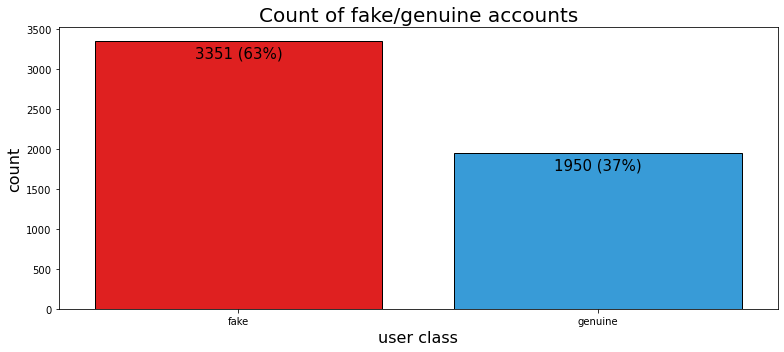

In [9]:
count_dist()

<center><span style="font-size:12px;color:#717171"><b>Figure 3. </b>Fake/Genuine Accounts Distribution</span></center>

The above graph shows that there were more fake followers in the dataset than genuine followers. This shows a mild degree of imbalance in the dataset. However, to avoid the potential for overfitting, I decided not to perform any resampling methods since after using SMOTE for this dataset, the ML models' test accuracies either did not change or improved only by less than 1%, so there's no urgent need to address such imbalance.

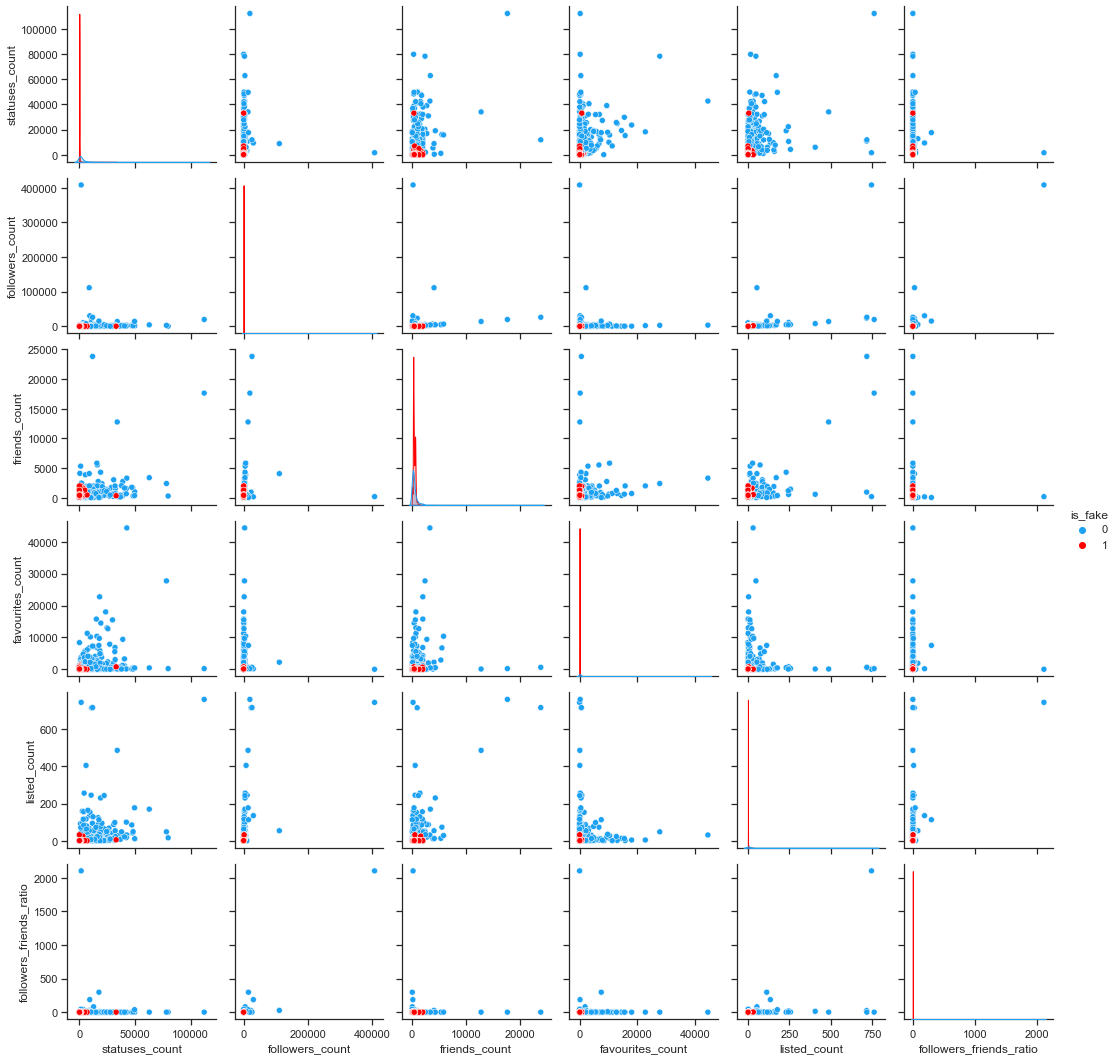

In [10]:
pairplot()

<center><span style="font-size:12px;color:#717171"><b>Figure 4. </b>Pairwise relationships between variables of the Twitter dataset</span></center>

Based on the pairplot above, the fake followers were clustered into the lower left corner of the plots which indicates lower numbers of statuses, followers, friends, favourites, and listed counts as compared to the more distributed points of the genuine accounts. Consequently, the follower/friend ratio is also very low for fake followers (as a quotient of followers over friends counts).

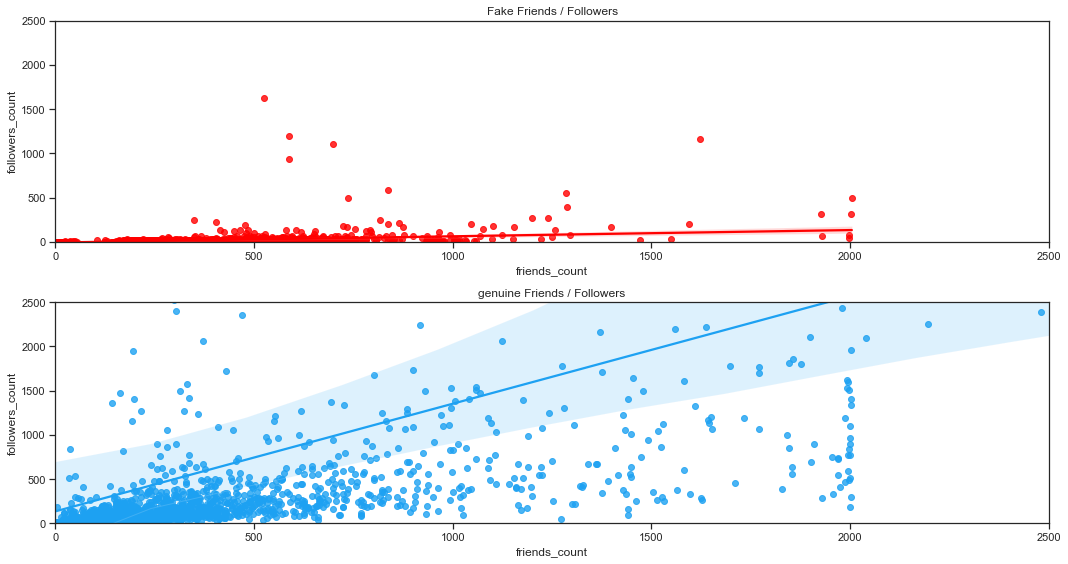

In [11]:
friends_followers_regplot()

<center><span style="font-size:12px;color:#717171"><b>Figure 5. </b>Regression plots of fake followers vs. genuine accounts</span></center>

Consistent with the pairplot results in Figure 4, the number of followers for fake accounts is lower compared to the number of friends (as a recap, this pertains to the number of users that a user is **following**) [[5]](#Twitter_Friends). 

It's easy to grasp that of course, fake followers would have more accounts that they follow because that is their goal for existence. And since these fake follower accounts are not there to interact, they usually have lower followers count. 

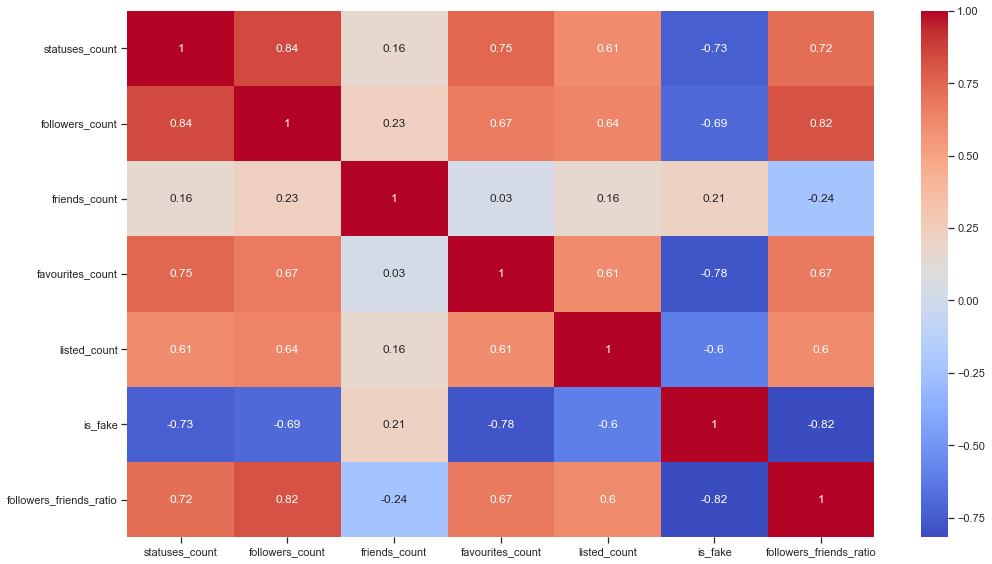

In [12]:
plot_heatmap()

<center><span style="font-size:12px;color:#717171"><b>Figure 6. </b>Heat map</span></center>

Figure 6 shows that `is_fake` (where 1 is a fake follower, and 0 is a genuine account) is positively correlated with friends_count (Number of users that a fake follower follows) which makes sense because following multiple users (for a fee or other reasons) is the main objective of a fake follower. The rest of the features are negatively correlated with is_fake because as these counts decreases, there's a higher chance that such account is a fake follower.

<h2 style="color:#657786">Checking conformity with Benford's Law</h2>

Based on the above discussions and graphs, it is evident that the social connections made by bots or fake followers are <b>unnatural</b> and thus, they tend to <b>violate Benford’s Law</b>.

So let's proceed to check if there are irregularities or indications of fake followers in each subset of data in the Twitter dataset. 

In the following subsections, I will test the conformity of the genuine accounts data subset only (genuine df), fake followers data subset only (fake df), and the whole dataset (df).

<h3 style="color:#14171A">Hypothesis Testing</h3>

**Null hypothesis:** The data subset follows the Benford's Law Distribution.

**Alternative hypothesis:** The data subset do not follow the Benford's Law Distribution.

I used **chi-squared test** with alpha = 0.05 to test my hypotheses and to determine how well a proposed model really fits the data we observe.

<h3 style="color:#14171A">BL on genuine accounts</h3>

Considering the key assumptions in the *BL Key Assumptions and Examples Section of this notebook*, the following features can only be used to check for BL conformity:

* followers_count
* statuses_count
* favourites_count

As illustrated below, genuine accounts follow BL Distribution:

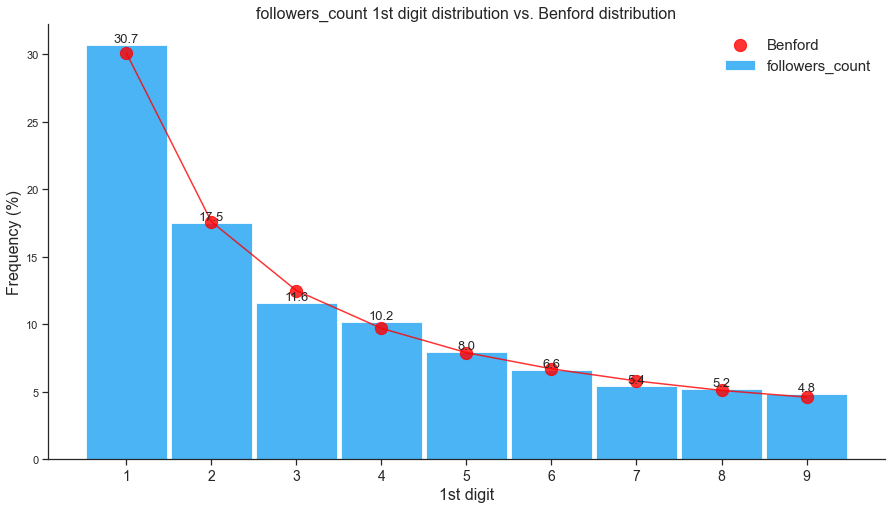


                     Chi-Squared Statistic = 2.7552
                                   p-value = 0.9488
For alpha=0.05, Chi-Squared Critical Value = 15.5073
Observed distribution matches expected BL distribution.


In [13]:
data_str = 'followers_count'
main(genuine, data_str)

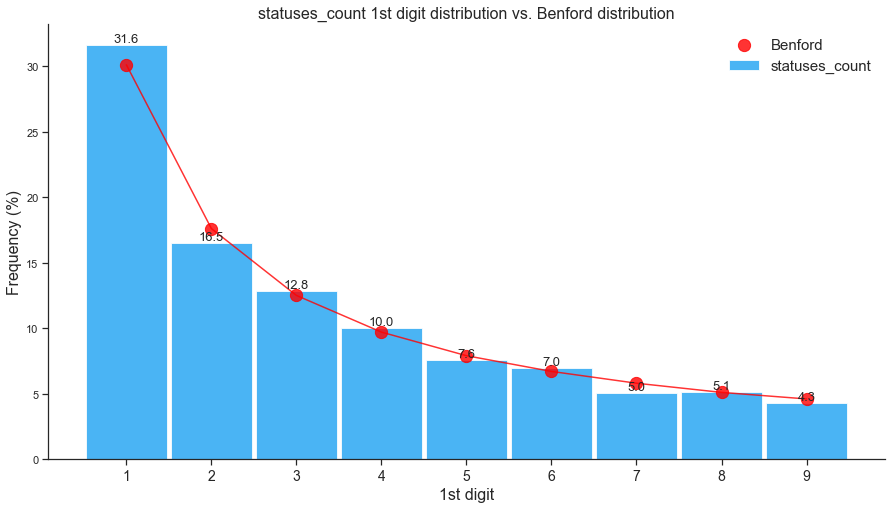


                     Chi-Squared Statistic = 5.9290
                                   p-value = 0.6552
For alpha=0.05, Chi-Squared Critical Value = 15.5073
Observed distribution matches expected BL distribution.


In [14]:
data_str = 'statuses_count'
main(genuine, data_str)

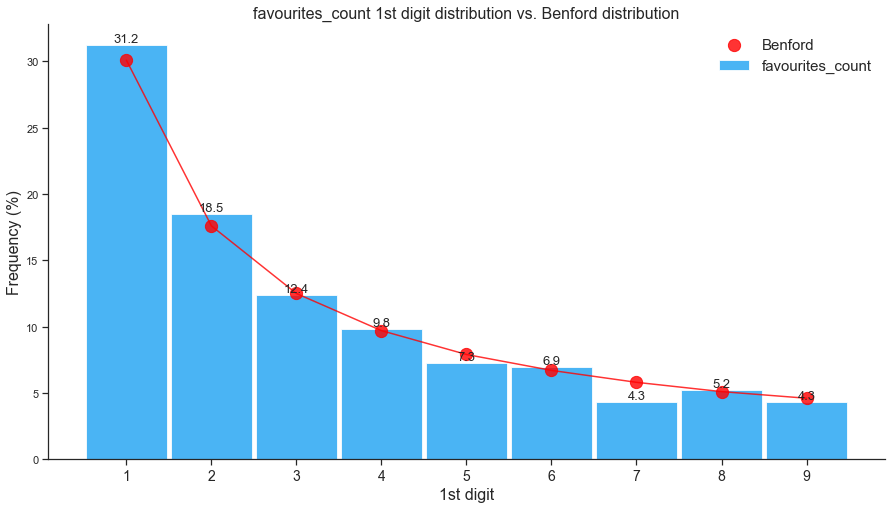


                     Chi-Squared Statistic = 9.1375
                                   p-value = 0.3308
For alpha=0.05, Chi-Squared Critical Value = 15.5073
Observed distribution matches expected BL distribution.


In [15]:
data_str = 'favourites_count'
main(genuine, data_str)

<h3 style="color:#14171A">BL on Fake followers' accounts</h3>

Considering the key assumptions in the *BL Key Assumptions and Examples Section of this notebook*, the following features can only be used to check for BL conformity:

* followers_count
* statuses_count
* favourites_count
* friends_count

As shown below, the fake df's distribution did not conform with BL Distribution:

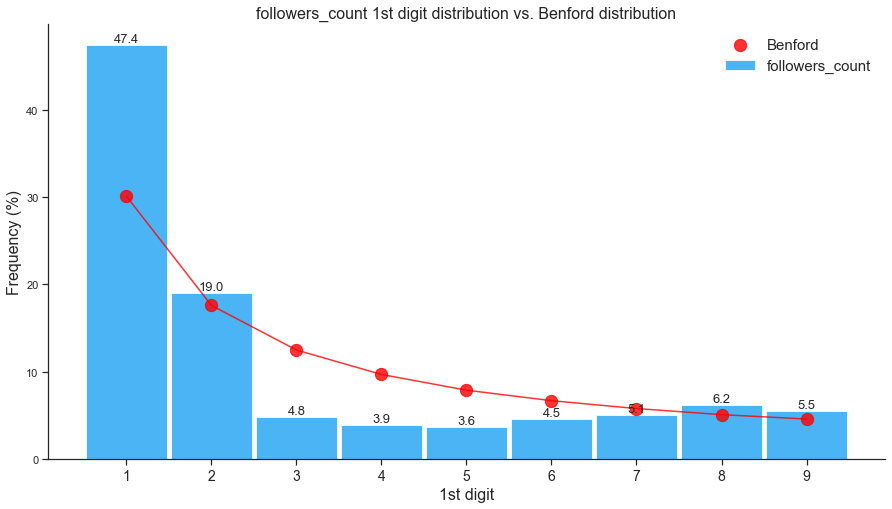


                     Chi-Squared Statistic = 710.4589
                                   p-value = 0.0000
For alpha=0.05, Chi-Squared Critical Value = 15.5073


Observed distribution does not match expected.


In [16]:
data_str = 'followers_count'
main(fake, data_str)

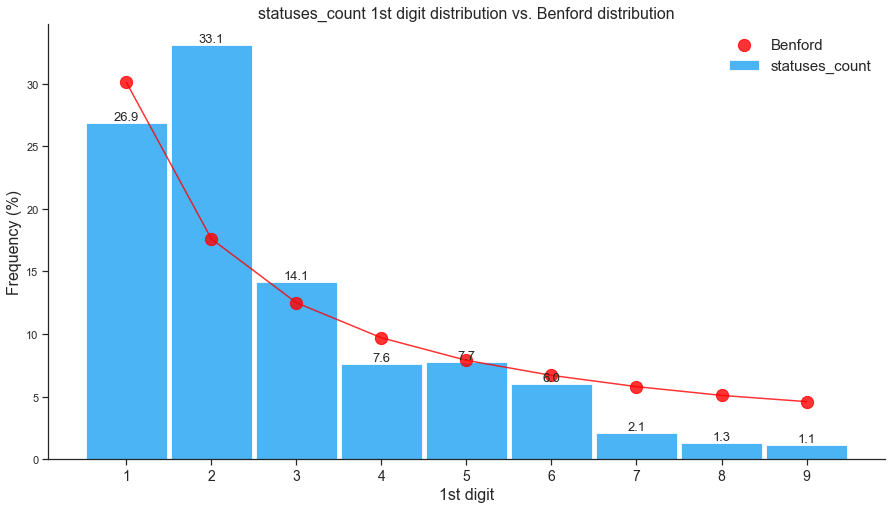


                     Chi-Squared Statistic = 724.0404
                                   p-value = 0.0000
For alpha=0.05, Chi-Squared Critical Value = 15.5073


Observed distribution does not match expected.


In [17]:
data_str = 'statuses_count'
main(fake, data_str)

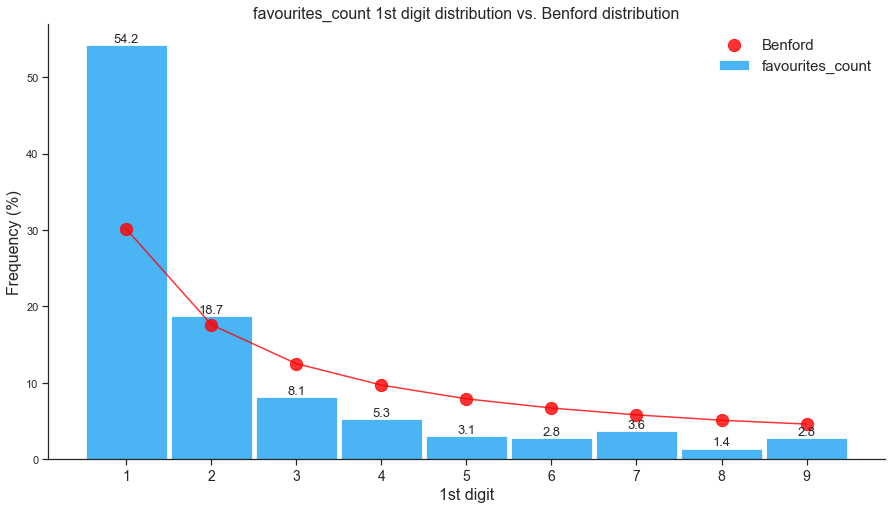


                     Chi-Squared Statistic = 115.7261
                                   p-value = 0.0000
For alpha=0.05, Chi-Squared Critical Value = 15.5073


Observed distribution does not match expected.


In [18]:
data_str = 'favourites_count'
main(fake, data_str)

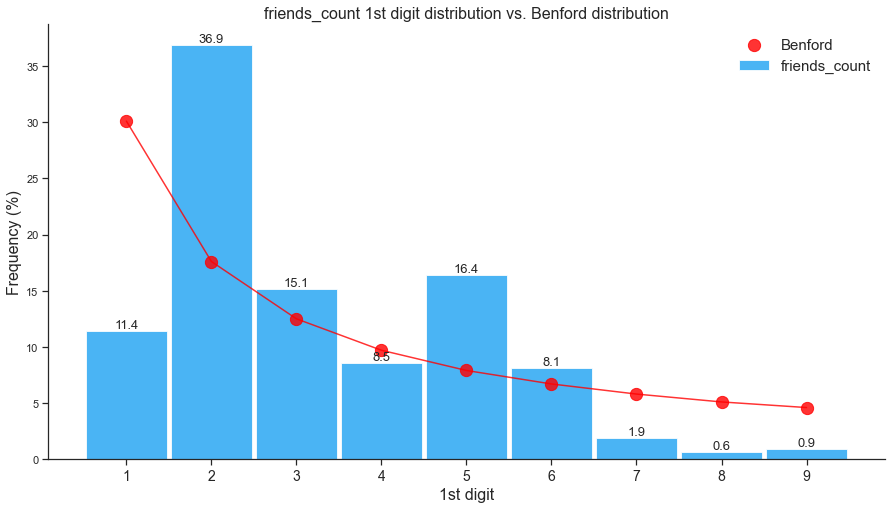


                     Chi-Squared Statistic = 1753.4473
                                   p-value = 0.0000
For alpha=0.05, Chi-Squared Critical Value = 15.5073


Observed distribution does not match expected.


In [19]:
data_str = 'friends_count'
main(fake, data_str)

<h3 style="color:#14171A">BL on the whole dataset (combined genuine and fake followers)</h3>

Considering the key assumptions in the *BL Key Assumptions and Examples Section of this notebook*, the following features can only be used to check for BL conformity:

* followers_count
* statuses_count
* favourites_count
* friends_count

As shown below, the whole df's distribution did not conform with BL Distribution:

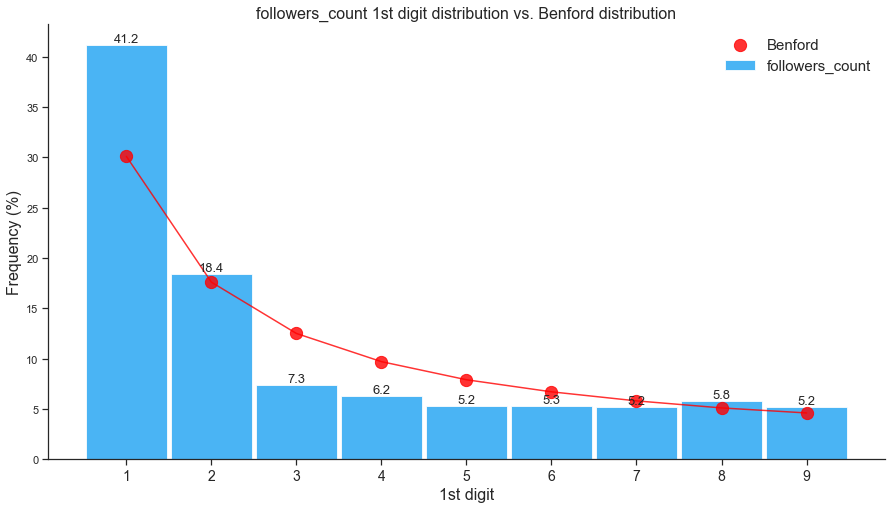


                     Chi-Squared Statistic = 464.0923
                                   p-value = 0.0000
For alpha=0.05, Chi-Squared Critical Value = 15.5073


Observed distribution does not match expected.


In [20]:
data_str = 'followers_count'
main(df, data_str)

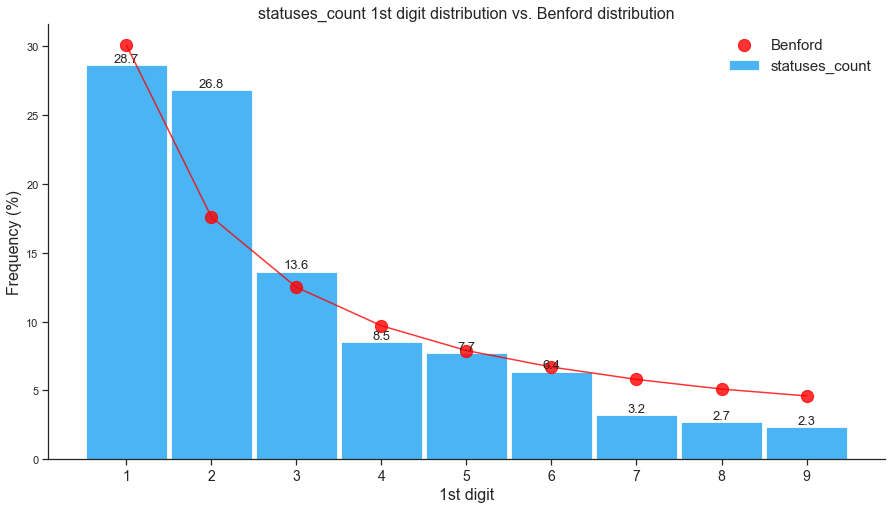


                     Chi-Squared Statistic = 441.5344
                                   p-value = 0.0000
For alpha=0.05, Chi-Squared Critical Value = 15.5073


Observed distribution does not match expected.


In [21]:
data_str = 'statuses_count'
main(df, data_str)

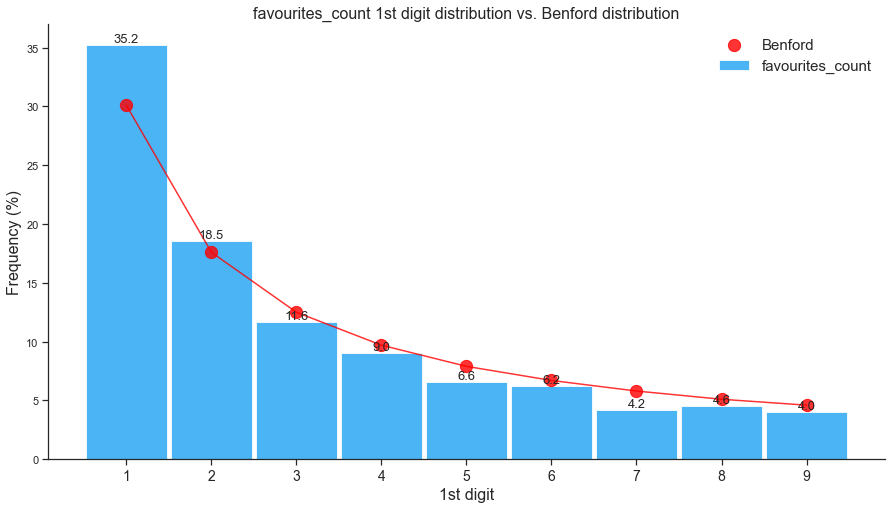


                     Chi-Squared Statistic = 38.1780
                                   p-value = 0.0000
For alpha=0.05, Chi-Squared Critical Value = 15.5073


Observed distribution does not match expected.


In [22]:
data_str = 'favourites_count'
main(df, data_str)

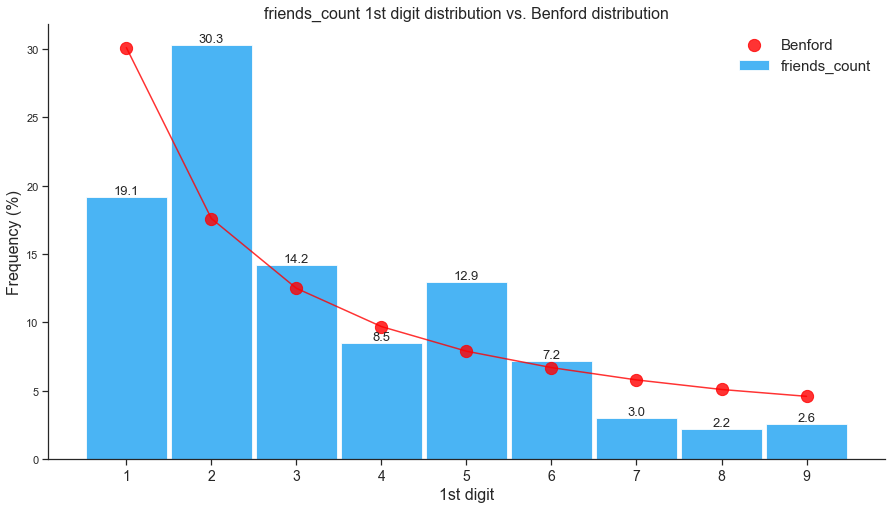


                     Chi-Squared Statistic = 1094.7883
                                   p-value = 0.0000
For alpha=0.05, Chi-Squared Critical Value = 15.5073


Observed distribution does not match expected.


In [23]:
data_str = 'friends_count'
main(df, data_str)

<h3 style="color:#14171A">Observations</h3>

As shown above, by checking the dataset's or data subset's 1st digit distribution, we can immediately see if there are irregularities or indications of fake followers or even bots in the dataset. We can use such insights to know which group of datasets or subsets to prioritize in checking when the objective of the study is to identify the existence of anomalies or manipulations or unnatural figures reported in the dataset (such as fraud, or fake followers in this study).

<h2 style="color:#657786">Machine Learning Application: Detecting Twitter Fake Followers</h2>

In this section, we will check if the high-level results of the BL indicating the existence of fake followers in the Twitter dataset is consistent with the auto-Machine Learning for classifiers results and confirm if the top predictor variable in the auto-ML is consistent with the intuition that social connections, especially pertaining to the followers/friends ratio, of the fake followers' accounts are unnatural.

<h3 style="color:#14171A">Proportion Chance Criterion</h3>

Before we start, let's establish the target baseline accuracy for our ML model:

In [24]:
num = (df.groupby('is_fake').size() / df.groupby('is_fake').size().sum())**2
print("Proportion Chance Criterion = {:.0f}%".format(100*num.sum()))
print("1.25*Proportion Chance Criterion = {:.0f}%".format(1.25*100*num.sum()))

Proportion Chance Criterion = 53%
1.25*Proportion Chance Criterion = 67%


<h3 style="color:#14171A">Use label encoder for all categorical values</h3>

In [25]:
df_features = df.copy().drop('is_fake', axis=1)
le = preprocessing.LabelEncoder()
dummy_fields = ['lang']

for each in dummy_fields:
    df_features[each] = le.fit_transform(df_features[each])
df_features.head()

statuses_count  followers_count  friends_count  favourites_count  \
0           20370             5470           2385               145   
1            3131              506            381                 9   
2            4024              264             87               323   
3           40586              640            622              1118   
4            2016               62             64                13   

   listed_count  lang  followers_friends_ratio  
0            52     7                     2.29  
1            40     2                     1.33  
2            16     2                     3.03  
3            32     2                     1.03  
4             0     7                     0.97

### Apply Standard Scaler

In [26]:
# Applied standard scaler to numerical features only, excluded "lang" column.
standard_scale_df()

Before scaling:



statuses_count  followers_count  friends_count  favourites_count  \
0           20370             5470           2385               145   
1            3131              506            381                 9   
2            4024              264             87               323   
3           40586              640            622              1118   
4            2016               62             64                13   

   listed_count  followers_friends_ratio  
0            52                     2.29  
1            40                     1.33  
2            16                     3.03  
3            32                     1.03  
4             0                     0.97

After scaling:



statuses_count  followers_count  friends_count  favourites_count  \
0            4.28             0.89           3.56              0.00   
1            0.44             0.04          -0.01             -0.12   
2            0.63             0.00          -0.53              0.17   
3            8.78             0.07           0.42              0.89   
4            0.19            -0.03          -0.57             -0.12   

   listed_count  followers_friends_ratio  
0          1.98                     0.05  
1          1.50                     0.02  
2          0.53                     0.07  
3          1.18                     0.01  
4         -0.11                     0.00

### Assign feature variables and target variables to X & y, respectively

In [27]:
X = df_features
y = df['is_fake']

### Auto-ML

Finally, we will use the auto-ML function to obtain the top predictor variable for detecting fake Twitter followers and compare its results to those of the BL:

['kNN', 1.0, 0.9859728506787331, 'N_Neighbor = 4', 'NA', 114.72680115699768]
114.72680115699768 seconds
['Logistic (l2)', 0.9699371069182391, 0.9680995475113121, 'C = 5000', 'followers_friends_ratio', 6.231409788131714]
6.231409788131714 seconds
['Logistic (l1)', 0.969056603773585, 0.9681749622926092, 'C = 1000', 'followers_friends_ratio', 11.616700887680054]
11.616700887680054 seconds
['Linear SVM (l2)', 0.9515974842767296, 0.9484162895927601, 'C = 100', 'followers_friends_ratio', 14.633708000183105]
14.633708000183105 seconds
['Linear SVM (l1)', 0.953811320754717, 0.9508295625942684, 'C = 10', 'followers_friends_ratio', 11.053277015686035]
11.053277015686035 seconds
['Random Forest', 1.0, 0.9904977375565611, 'Max_features = 0.5', 'followers_friends_ratio', 17.414363861083984]
17.414363861083984 seconds
['Gradient Boosting Method', 0.9981635220125786, 0.9911764705882353, 'Max_features = 0.7', 'followers_friends_ratio', 11.877819061279297]
17.414363861083984 seconds


Machine Learning Method  Train Accuracy  Test Accuracy  \
0                       kNN            1.00           0.99   
1             Logistic (l2)            0.97           0.97   
2             Logistic (l1)            0.97           0.97   
3           Linear SVM (l2)            0.95           0.95   
4           Linear SVM (l1)            0.95           0.95   
5             Random Forest            1.00           0.99   
6  Gradient Boosting Method            1.00           0.99   

       Best Parameter   Top Predictor Variable  Run Time  
0      N_Neighbor = 4                       NA    114.73  
1            C = 5000  followers_friends_ratio      6.23  
2            C = 1000  followers_friends_ratio     11.62  
3             C = 100  followers_friends_ratio     14.63  
4              C = 10  followers_friends_ratio     11.05  
5  Max_features = 0.5  followers_friends_ratio     17.41  
6  Max_features = 0.7  followers_friends_ratio     11.88

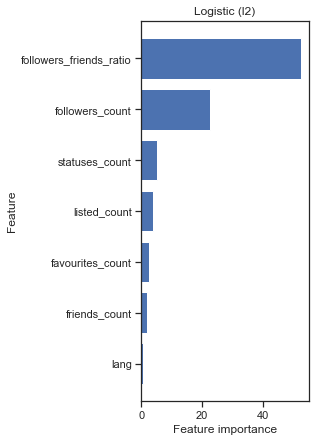

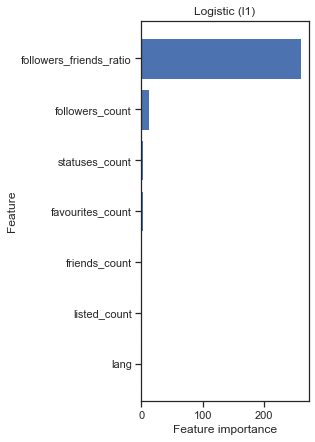

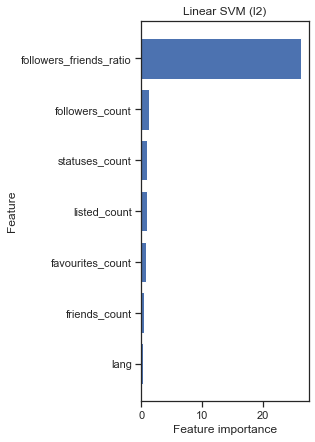

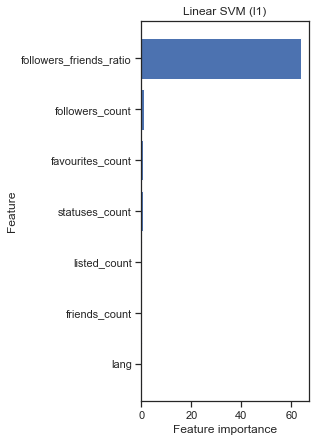

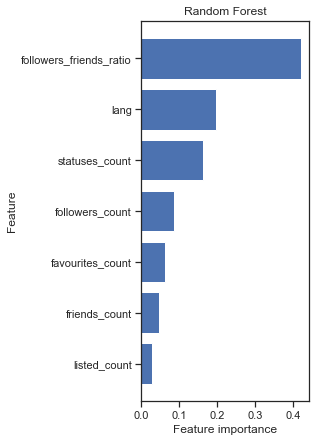

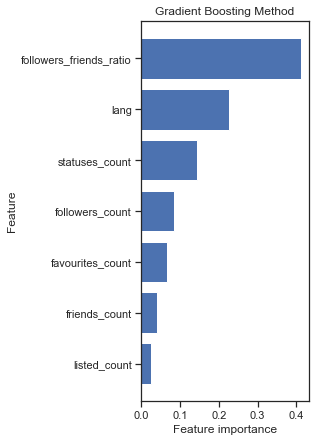

In [28]:
auto_ML_7in1(X, y, Number_trials=10)

**Observations**

As expected, consistent with the BL results, the `followers/friends ratio` is the top predictor variable for all models (NA for kNN) in the auto-ML with Gradient Boosting, Random Forest, and kNN Methods yielding the top 3 highest accuracies. This confirms our initial intuition that fake followers' number of followers over number of friends (followings) is the main factor in determining if an account is fake or genuine.

<h1 style="color:#1DA1F2">CONCLUSION</h1>

This study introduced Benford's Law and its application in Machine Learning. The process and observations detailed in the Results and Discussion section of this notebook demonstrate the application of Benford's Law on the Cresci-2015 dataset. The key challenge was finding a non-synthetic dataset that satisfies the prerequisites for Benford's Law application. Features such as follower counts, friends count, and others were identified as distinguishing factors between fake and genuine accounts. These characteristics were then used to check the conformity with Benford's Law and applied to Machine Learning models to classify users. The models showed a high detection accuracy (99%+) for identifying fake followers.

While fake followers try to mimic genuine activities, their unnatural behaviour means they violate Benford's Law. Even a slight variation in their first-digit distribution could cause the entire data to deviate from the Benford's Law distribution.

By applying Benford's Law, we detected the presence of fake followers in the datasets. All genuine accounts followed Benford's Law distribution, while those datasets with fake followers (like the fake dataframe and combined/original dataframe) did not conform to the Benford's Law distribution.

Furthermore, the auto-ML provided results consistent with the Benford's Law findings. The ratio of follower count to friends count was a consistent top predictor variable across all Machine Learning models used. This confirmed the initial intuition that the ratio of a user's followers to friends (followings) is the primary factor in determining if an account is genuine or fake.

In summary, we can conclude that naturally occurring datasets follow Benford's Law. A simple visualization of Benford's Law can be used as part of the pipeline for detecting anomalies, or as part of exploratory data analysis to check for irregularities indicating potential errors, fraud, manipulative bias, or issues with processing efficiency in a dataset. In addition, Benford's Law could also be applied as a standalone, initial indicator for the presence of fake followers, providing a rough yet valuable preliminary identification tool. Lastly, for large datasets, Benford's Law can assist in performing highly focused tests to detect deviations in subsets before starting with the Machine Learning modelling process.

<h1 style="color:#1DA1F2">RECOMMENDATIONS FOR FUTURE STUDIES</h1>

Since this study was primarily conducted to introduce how BL can complement or help provide simple and immediate insights about any irregularities or signs of manipulation in our datasets, there are a lot of improvements that could be implemented for future studies. Considering the insights obtained from the analyses and conclusion above, the following items are highly recommended to be pursued in future studies:

1. **Use larger datasets**: To fully exhibit the strengths and uses of BL as a complement or part of an ML pipeline or even just as part of an EDA, since BL's results tend to be more accurate as the size of the dataset increases, it would be best to use a larger dataset. 

2. **Real-time Fake follower detection**: Considering the results discussed in this notebook, it would be very beneficial to make BL and ML fake follower detection work in real-time as a web or app add-in to help with the immediate detection of the existence of fake followers or even bots in the app that a user is using.

3. **Consider other non-numeric features for a stronger model**: Using Natural Language Processing or information retrieval and other models to process and include non-numeric features such as actual tweets made by the users could be used in conjunction with the aforementioned BL and ML steps to strengthen the precision and recall of the dataset. 

Further exploration and study of BL related to improving ML models in detecting fake followers would help make Twitter and any other social media applications a safer environment for all genuine users.

<h1 style="color:#1DA1F2">REFERENCES</h1>

<a name='Dataset'></a>[1]  Cresci, S., Di Pietro, R., Petrocchi, M., Spognardi, A., & Tesconi, M. (2015). Fame for sale: efficient detection of fake Twitter followers. Decision Support Systems, 80, 56-71.

<a name='Bot_repository'></a>[2]  Bot Repository developers. (2022, November). Bot Repository Website. https://botometer.osome.iu.edu/bot-repository/datasets.html.

<a name='US_census'></a>[3]  Nigrini, M. (Wiley, 2012). Benford's Law. https://nigrini.com/benfords-law/

<a name='Examples'></a>[4]  National Association of State Auditors, Comptrollers and Treasurers. (2017). Fraud Analysis and Detection: Using Benfords Law and Other Effective Techniques. https://www.youtube.com/watch?v=9tpGVq5DcTw&t=4961s

<a name='Twitter_Friends'></a>[5]  Twitter Developers. (2022, November). Follow, search, and get users. https://developer.twitter.com/en/docs/twitter-api/v1/accounts-and-users/follow-search-get-users/overview

**END**